## Data Gathering

In [ ]:
# Installing SNScrape for webscraping data off twitter

!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 2.4 MB/s eta 0:00:00


In [ ]:
# Importing all necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter

In [ ]:
# Scraping data containing the necesary keywords

scraper = sntwitter.TwitterSearchScraper('(#AZIMIO OR #RUTO #WILLIAMRUTO OR #RAILA OR OR #IEBC OR #kenyaElections2022 OR @RAILAODINGA) since:2022-01-01 until:2022-08-09')

In [ ]:
# Saving all data in a pandas dataframe with proper column names

tweets = []

for i,tweet in enumerate(scraper.get_items()):
  data = [tweet.user.username,
          tweet.user.verified,
          tweet.user.created,
          tweet.user.followersCount,
          tweet.user.friendsCount,
          tweet.retweetCount,
          tweet.lang,
          tweet.date,
          tweet.likeCount,
          tweet.sourceLabel,
          tweet.id,
          tweet.content,
          tweet.hashtags,
          tweet.conversationId,
          tweet.inReplyToUser,
          tweet.coordinates,
          tweet.place,
          tweet.retweetCount]
  tweets.append(data)
  if i>100000:
    break

election_tweets = pd.DataFrame(tweets, columns = ["User",
                                                  "verified",
                                                  "Date_Created",
                                                  "Follows_Count",
                                                  "Friends_Count",
                                                  "Retweet_Count",
                                                  "Language",
                                                  "Date_Tweet",
                                                  "Number_of_Likes",
                                                  "Source_of_Tweet",
                                                  "Tweet_Id",
                                                  "Tweet",
                                                  "Hashtags",
                                                  "Conversation_Id",
                                                  "In_reply_To",
                                                  "Coordinates",
                                                  "Place",
                                                  "retweets"])

election_tweets.head()

<ipython-input-4-3c51010fb0bb>:17: FutureWarning: content is deprecated, use rawContent instead
  tweet.content,


,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,retweets
0,JadeJela,False,2009-04-15 08:41:55+00:00,3813,1450,0,qht,2022-08-08 20:54:43+00:00,1,Twitter for Android,1556745745788715019,#KenyaDecides2022 #IEBC #Raila #Ruto,"[KenyaDecides2022, IEBC, Raila, Ruto]",1556745745788715019,None,None,None,0
1,karanjasan,False,2013-10-12 23:44:13+00:00,3322,2835,0,en,2022-08-08 17:32:27+00:00,0,Twitter for iPhone,1556694844839534599,We’re liiiiveee!! #KenyaKwanza #Azimio #Uhuru ...,"[KenyaKwanza, Azimio, Uhuru, Ruto, Raila, Odin...",1556694844839534599,None,None,None,0
2,itknowsitall,False,2013-12-02 06:41:58+00:00,221,452,0,en,2022-08-08 16:10:00+00:00,1,Twitter for iPhone,1556674095600865282,@iitsjames Chebukati should be sacked for this...,"[IEBC, IELTS, Azimio, KenyaKwanza]",1556652864180830211,https://twitter.com/iitsjames,None,None,0
3,lnstill_,False,2013-02-02 12:26:53+00:00,364,54,0,en,2022-08-08 15:46:52+00:00,2,Twitter for iPhone,1556668272787050496,"Personally am not tired with Kenyatttas, Mois,...","[IEBC, Azimio, Karua]",1556668272787050496,None,None,None,0
4,ArbcomAdventure,False,2022-05-16 05:36:53+00:00,4,28,0,in,2022-08-08 14:09:20+00:00,0,Twitter Web App,1556643726566498304,Kenya +254714059633\nCanada +15876644404\n inf...,"[JobInPeru, JobInBrazil, Volunteers, Iebc, Rut...",1556643717603270657,https://twitter.com/ArbcomAdventure,None,None,0


In [ ]:
# Saving to csv

election_tweets.to_csv("Election_Tweets.csv")

In [ ]:
#exporting data
#election_data = election_tweets.to_csv('election_data.csv', index = True, encoding ='utf-8')
#print('KENAFF DATA:\n', election_data)
#print(kenaff_data)



## EDA

In [ ]:
# Loading Data and checking first five rows

election_tweets = pd.read_csv("Election_Tweets.csv")

election_tweets.head()

,Unnamed: 0,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,retweets
0,0,MosesHaabwa,False,2021-12-12 22:15:10+00:00,2176,943,0,en,2022-08-21 22:59:21+00:00,0,Twitter for Android,1561488152166023168,"@MosesHaabwa was verified, @cisuganda was veri...",['Ruto'],1561486199067394048,https://twitter.com/MosesHaabwa,NaN,NaN,0
1,1,EremonDaniel,False,2019-10-02 04:33:26+00:00,1448,3985,0,en,2022-08-21 18:53:46+00:00,0,Twitter for Android,1561426349763477504,@Rephael_Tuju @WilliamsRuto As you talk of #Ru...,['Ruto'],1560873200816463872,https://twitter.com/RaphaelTujuEGH,NaN,NaN,0
2,2,LabanWekz,False,2021-04-14 04:46:08+00:00,33,90,0,en,2022-08-21 17:16:43+00:00,0,Twitter Web App,1561401927623397376,#Azimio should protect their evidence at the s...,['Azimio'],1561401927623397376,NaN,NaN,NaN,0
3,3,AnariThaddeaus,False,2014-04-16 08:18:48+00:00,524,824,2,en,2022-08-21 17:01:35+00:00,3,Twitter for Android,1561398118918361088,"It doesn't matter who leaves, I won't leave! I...","['RailaOdinga', 'SCOK', 'Azimio']",1561398118918361088,NaN,NaN,NaN,2
4,4,ehdande,False,2014-10-16 06:45:04+00:00,9749,589,0,en,2022-08-21 16:50:03+00:00,1,Twitter for iPhone,1561395215637876736,"Amidst all the post election discussions, I th...","['Ruto', 'Raila']",1561395215637876736,NaN,NaN,NaN,0


In [ ]:
election_tweets.shape

(4071, 19)

In [ ]:
#Dropping unnecessary

election_data= election_tweets[['User', 'Tweet']]

#Previewing data
election_data.head(5)

,User,Tweet
0,MosesHaabwa,"@MosesHaabwa was verified, @cisuganda was veri..."
1,EremonDaniel,@Rephael_Tuju @WilliamsRuto As you talk of #Ru...
2,LabanWekz,#Azimio should protect their evidence at the s...
3,AnariThaddeaus,"It doesn't matter who leaves, I won't leave! I..."
4,ehdande,"Amidst all the post election discussions, I th..."


In [ ]:
# Looking for missing values

election_data.isnull().sum()

User     0
Tweet    0
dtype: int64

In [ ]:
#Checking for duplicates
election_data.duplicated().sum()


10

In [ ]:
#duplicate = election_data.duplicated[election_data.duplicated.duplicated()]

#print("Duplicate Rows :")

In [ ]:
election_data=election_data.drop_duplicates().sum()

In [ ]:
election_data.shape

(5,)

In [ ]:

raila_handle = ['RailaOdinga', 'Raila Odinga', 'Baba', 'Raila', 'Azimio','Martha Karua','MarthaKaraua']
ruto_handle = ['WilliamRuto', 'Ruto', 'William', 'KenyaKwanza','Hustler','RigathiGachagua','Rigathi','Gachagua']
wajackoya_handle=['Wajackoyah','RootsParty','Roots Party','Justina Wamae']

In [ ]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

election_data['Raila'] = election_data['Tweet'].apply(lambda x: identify_subject(x, raila_handle))
election_data['Ruto'] = election_data['Tweet'].apply(lambda x: identify_subject(x, ruto_handle))
election_data['Wajackoya'] = election_data['Tweet'].apply(lambda x: identify_subject(x, wajackoya_handle))
election_data.head(10)

AttributeError: ignored

In [ ]:
election_data.tail(10)

,User,Tweet,Raila,Ruto,Wajackoya
4061,MombasaCGW,CONGRATS\nEthics and Anti-Corruption Commissio...,1,1,0
4062,MombasaCGW,"It's the newspapers , with the same photo that...",1,1,0
4063,budgetcomps_ke,"TP-Link Powerline Wi-Fi Kit : Ksh 8,500\n\n300...",1,1,0
4064,omoro_mr,The OKA dudes reminds me of when armchair quar...,1,0,0
4065,OscarMvuria,Go listen to my music and retweet support KE...,0,0,0
4066,Jonka254,Who else is running for President in #Kenya ca...,1,1,0
4067,LemaTrueboy,Welcome all\nThe day is Friday\n#Raila \n#Ruto...,1,1,0
4068,cNyarige,Car still available \nSome more pics \n#carsal...,1,1,0
4069,vusisa97,The real purpose of the opposition is to minim...,1,0,0
4070,MombasaCGW,We have no shortage of dunderheads who are lea...,1,1,0


In [ ]:
from textblob import TextBlob

raila_txt=TextBlob(raila["text"][100])
print(raila["text"][100])
print("raila:", raila_txt.sentiment)

ruto_txt=TextBlob(ruto["text"][500])
print(ruto["text"][500])
print("ruto:", ruto_txt.sentiment)

## EDA

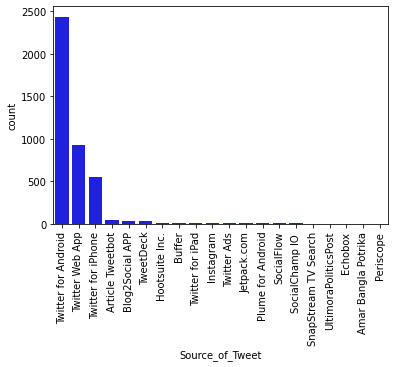

In [ ]:
# Distribution of sources of tweets in descending order
sns.countplot(data = election_tweets, x = 'Source_of_Tweet', color = 'blue', order = election_tweets['Source_of_Tweet'].value_counts().iloc[:20].index).tick_params(axis='x', rotation=90)

**OBSERVATION:**

A significantly very high number the Tweets were sourced from Twitter for Android, followed by Twitter Web App and the least number of Tweets were sourced from Periscope.

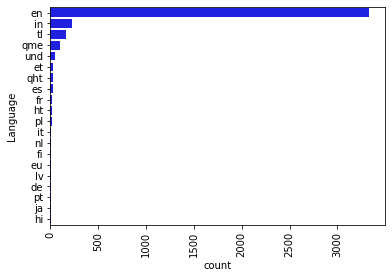

In [ ]:
# Frequency Distribution of languages used on tweets in descending order
sns.countplot(data = election_tweets, y = 'Language', color = 'blue', order = election_tweets['Language'].value_counts().iloc[:20].index).tick_params(axis='x', rotation=90);

English (en) is the most used language in the Tweets followed by in, then tl.

The least number of Tweets are in pt Language.


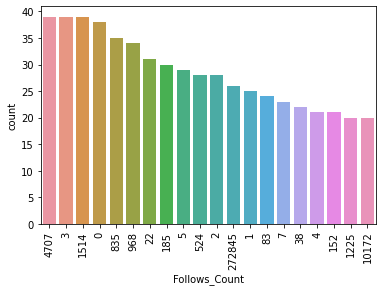

In [ ]:
# Top 20 number of people that tweet owners follow
sns.countplot(data = election_tweets, x = 'Follows_Count', order = election_tweets['Follows_Count'].value_counts().iloc[:20].index).tick_params(axis='x', rotation=90)

**OBSERVATIONS:**

Most of the accounts that tweeted have 4705 follows. Followed by 3 then 1513.

Tweeter users with different number of follows tweeted about Kenyan presidential elections.

Even people with no follows are among the top Twitter users discussing Kenyan Presidential Elections.

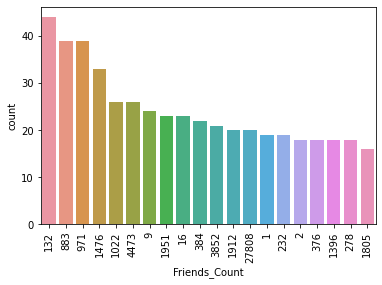

In [ ]:
# Top 20 number of people that tweet owners friends
sns.countplot(data = election_tweets, x = 'Friends_Count', order = election_tweets['Friends_Count'].value_counts().iloc[:20].index).tick_params(axis='x', rotation=90)

**OBSERVATIONS:**

Most of the accounts that tweeted have 4705 follows. Followed by 3 then 1513.

Tweeter users with different number of friends tweeted about Kenyan presidential elections.

Even people with 1 friend are among the top Twitter users discussing Kenyan Presidential Elections.

In [ ]:
# sns.barplot(data = election_tweets, x = election_tweets.index, y = 'Date_Created')

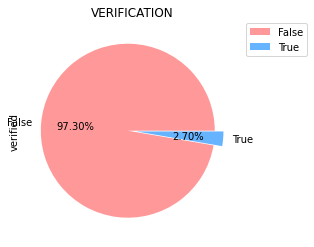

In [ ]:
# comparison between verified and unverified Twitter users commenting on the users

# defining data
data = election_tweets['verified'].value_counts()

# plotting pie chart
data.plot.pie(autopct='%.2f%%', colors = ['#ff9999','#66b3ff'], explode = (0.05, 0.05))

# define tittle
plt.title('VERIFICATION')

# add legend
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

# displaying chart
plt.show()

**OBSERVATION:**

A very high percentage (97.35%) of Twitter users who tweeted about Kenyan Presidential elections are not verified.

Only 2.65% of Twitter users who tweeted about Kenyan Presidential elections are verified.